In [ ]:
#loading all the libraries in one cell
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import time
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Task 1: Load the Spambase Dataset

In [ ]:
import pandas as pd
import numpy as np
#read the spam dataset as a csv
df = pd.read_csv("https://archive.ics.uci.edu/static/public/94/data.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


#Task 2: Check for Duplicate Entries and Missing Values

In [ ]:
# checking for duplicate values in any row w.r.t all columns
if(df.duplicated()).any():
  print("Duplicate entries found")
else:
  print("No duplicate entries found")

Duplicate entries found


In [ ]:
df = df.drop_duplicates()  #drop rows that are redundant

In [ ]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [ ]:
#capturing Class column of the dataframe in target and removing it from original df
target = df['Class']
df.drop(columns='Class', inplace=True)

#Task 3: Preprocess the Dataset



In [ ]:
#using standardscaler to standardize all the columns into df_scaled
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954


In [ ]:
df_scaled.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,-2.700400e-17,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-1.164071e-01,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,3.338604e+01,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


<Axes: xlabel='capital_run_length_total', ylabel='Count'>

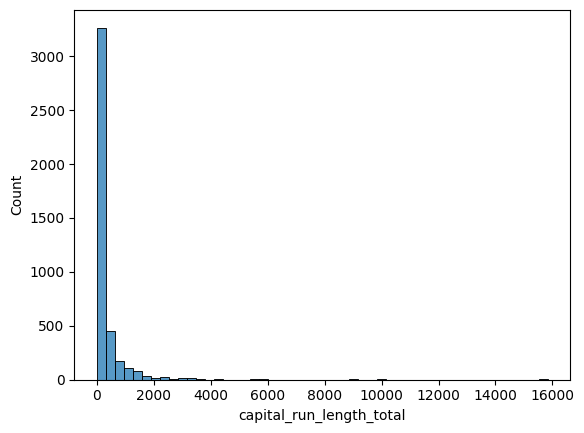

In [ ]:
sns.histplot(df['capital_run_length_total'], bins=50)  #an example scaled column

In [ ]:
#converting pandas df to numpy arrays
X = np.array(df_scaled)
y = np.array(target)

#Task 4: Check Dataset Balance

{0: 2531, 1: 1679}
Ratio of class 0 to class 1 is  1.5074449076831447


Text(0.5, 1.0, 'Class Distribution')

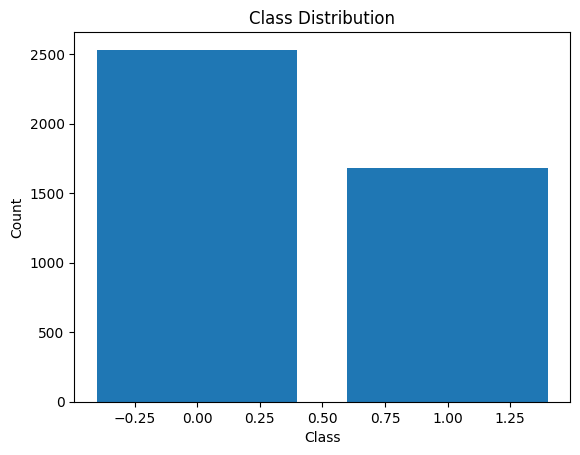

In [ ]:
'''
  for checking class balance, we take the target column (y) and count the number of instances of each class
'''
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
ratio = counts[0]/counts[1]
print("Ratio of class 0 to class 1 is ", ratio)
#visualizing the above result using bargraph
plt.bar(unique, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

#Task 5: Split the Data

In [ ]:
'''
splitting the dataset into training, validation and testing sets.
the ratios being 70:15:15
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42)

In [ ]:
#pandas df to numpy array conversions
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

#Task 6: Implement Logistic Regression from Scratch

In [ ]:
'''
 For implementing logistic regression we need to first build a sigmoid function.
 After that we do gradient descent with l1 regularization.
'''
# this is the sigmoid function where inputs are columns and weights
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

#this function gives the gradient
def gradient_descent(X, h, y, weight, lam):
    return np.dot(X.T, (h - y)) / y.shape[0] + lam * np.sign(weight)

#class predict is used to assign probabilities to classes
def class_predict(result):
  for i in range(len(result)):
    if result[i] >= 0.5:
        result[i] = 1
    else:
        result[i] = 0
  return result

In [ ]:
'''
  For selecting the best learning rate, we decide to do 5-fold cross validation.And then based on average accuracy
  for each learning rate we select the best one. Learning rates considered are 0.01, 0.05, 0.1 and 0.5
'''
start_time = time.time() # to measure training time
num_iter = 10000         # arbitrary number of iterations, 10000 felt good enough
k = 5                    # 5-fold cross validation
learning_rate = [0.01, 0.05, 0.1, 0.5]
lam = 0.01               #l1 regularization parameter is fixed here, best fit will be learned later
kfsplit = KFold(n_splits=k, random_state=42, shuffle=True)  #this does the k-fold (5) split
mean_accuracy = []      # for every learning rate mean accuracy over 5 folds is stored in this list
for alpha in learning_rate:
  for train_index, val_index in kfsplit.split(X_train):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    theta = np.zeros(X_train.shape[1])   # initialization weights/params
    accuracy_fold = []
    for i in range(num_iter):            # we iteratively move towards the minima using gradient_descent
      h = sigmoid(X_train_fold, theta)
      gradient = gradient_descent(X_train_fold, h, y_train_fold, theta, lam)
      theta = theta - gradient*alpha     # updation of weights
    print("Training Time : ", (time.time() - start_time))
    result = sigmoid(X_val_fold, theta)  # testing out learned weights on validation set
    y_fold_pred = class_predict(result)  # assigning classes
    y_val_fold = class_predict(y_val_fold)
    accuracy = accuracy_score(y_val_fold, y_fold_pred)
    accuracy_fold.append(accuracy)
    print("Accuracy for learning rate {} is {}".format(alpha, accuracy))
  mean_accuracy.append(np.mean(accuracy_fold))

print("Best learning rate is ", learning_rate[np.argmax(mean_accuracy)]) # argmax

Training Time :  2.183317184448242
Accuracy for learning rate 0.01 is 0.9254237288135593
Training Time :  4.27549934387207
Accuracy for learning rate 0.01 is 0.9305084745762712
Training Time :  7.289047479629517
Accuracy for learning rate 0.01 is 0.9305084745762712
Training Time :  10.672634601593018
Accuracy for learning rate 0.01 is 0.9269949066213922
Training Time :  12.773120164871216
Accuracy for learning rate 0.01 is 0.9320882852292021
Training Time :  14.853705644607544
Accuracy for learning rate 0.05 is 0.9338983050847458
Training Time :  17.752828359603882
Accuracy for learning rate 0.05 is 0.9372881355932203
Training Time :  20.15126085281372
Accuracy for learning rate 0.05 is 0.9305084745762712
Training Time :  24.63826060295105
Accuracy for learning rate 0.05 is 0.9269949066213922
Training Time :  26.677539110183716
Accuracy for learning rate 0.05 is 0.9388794567062818
Training Time :  28.80893063545227
Accuracy for learning rate 0.1 is 0.9338983050847458
Training Time :  3

In [ ]:
#with learning rate as 0.5 now let us decide the best l1 parameter
#the below code is similar to learning rate selection.

start_time = time.time()
num_iter = 10000
k = 5 #5-fold cross validation
l1_values = [0.01, 0.05, 0.1, 0.5]
learning_rate = 0.5       # learning rate is fixed here (best one)
kfsplit = KFold(n_splits=k, random_state=42, shuffle=True)
mean_accuracy = []
for l1_coef in l1_values:      #iterate over all regularization parameters
  for train_index, val_index in kfsplit.split(X_train):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    theta = np.zeros(X_train.shape[1]) #initialization weights/params
    accuracy_fold = []
    for i in range(num_iter):           # we iteratively move towards the minima using gradient_descent
      h = sigmoid(X_train_fold, theta)
      gradient = gradient_descent(X_train_fold, h, y_train_fold, theta, l1_coef)
      theta = theta - gradient*learning_rate
    print("Training Time : ", (time.time() - start_time))
    result = sigmoid(X_val_fold, theta) # testing out learned weights on validation set
    y_fold_pred = class_predict(result)  # assigning classes
    y_val_fold = class_predict(y_val_fold)
    accuracy = accuracy_score(y_val_fold, y_fold_pred)
    accuracy_fold.append(accuracy)
    print("Accuracy for learning rate {} is {}".format(l1_coef, accuracy))
  mean_accuracy.append(np.mean(accuracy_fold))

print("Best regularization parameters is ", l1_values[np.argmax(mean_accuracy)])  # argmax

Training Time :  2.052887439727783
Accuracy for learning rate 0.01 is 0.9322033898305084
Training Time :  4.0840113162994385
Accuracy for learning rate 0.01 is 0.9372881355932203
Training Time :  6.175647020339966
Accuracy for learning rate 0.01 is 0.9305084745762712
Training Time :  8.252254247665405
Accuracy for learning rate 0.01 is 0.9252971137521222
Training Time :  11.538020372390747
Accuracy for learning rate 0.01 is 0.9405772495755518
Training Time :  15.056272029876709
Accuracy for learning rate 0.05 is 0.8949152542372881
Training Time :  17.062552452087402
Accuracy for learning rate 0.05 is 0.8864406779661017
Training Time :  19.101619482040405
Accuracy for learning rate 0.05 is 0.9152542372881356
Training Time :  21.191121578216553
Accuracy for learning rate 0.05 is 0.8981324278438031
Training Time :  23.23123526573181
Accuracy for learning rate 0.05 is 0.8998302207130731
Training Time :  26.94453191757202
Accuracy for learning rate 0.1 is 0.8745762711864407
Training Time : 

In [ ]:
#best learning rate = 0.5
#best l1 parameter = 0.01
theta = np.zeros(X_train.shape[1])   # finally tuning the weights based on selected hyperparameters
for i in range(num_iter):
  h = sigmoid(X_train, theta)
  gradient = gradient_descent(X_train, h, y_train, theta, 0.01)
  theta = theta - gradient*0.5

y_pred = sigmoid(X_test, theta)  # testing the trained weights on X_test
y_pred = class_predict(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9129746835443038


#Task 7: Evaluate Model Performance

[[355  18]
 [ 37 222]]

Precision: 0.925
Recall: 0.8571428571428571
F1 Score: 0.8897795591182365
AUC Score: 0.9203435804701627


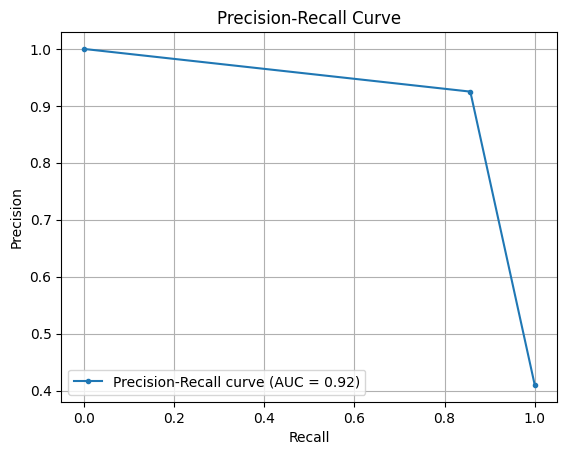

In [ ]:
'''
  evaluation metrics used are confusion_matrix, precision, recall_score and f1 score
'''
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

#precision score
precision = precision_score(y_test, y_pred)
print("\nPrecision:", precision)

#recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#f1 score is harmonic mean of precision and recall
f1 = 2*(precision*recall)/(precision+recall)
print("F1 Score:", f1)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print("AUC Score:", auc_score)

plt.figure()
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

#Task 8: Compare with Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
'''
  The penalty parameter is set to l1, that is lasso regularization.
'''
model = LogisticRegression(penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# grid search is used to evaluate the model performance on different hyperparameter values
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_           #best hyperparameter values are taken into the model
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

y_test_pred = best_model.predict(X_test)           # predictiction is made on the X_test and
                                                   # accuracy is evaluated
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

#classification report gives detailed metrics showing how well the model has performed.
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.9111111111111111
Test Accuracy: 0.9129746835443038

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       373
           1       0.91      0.87      0.89       259

    accuracy                           0.91       632
   macro avg       0.91      0.91      0.91       632
weighted avg       0.91      0.91      0.91       632



AUC Score: 0.9180461925204677


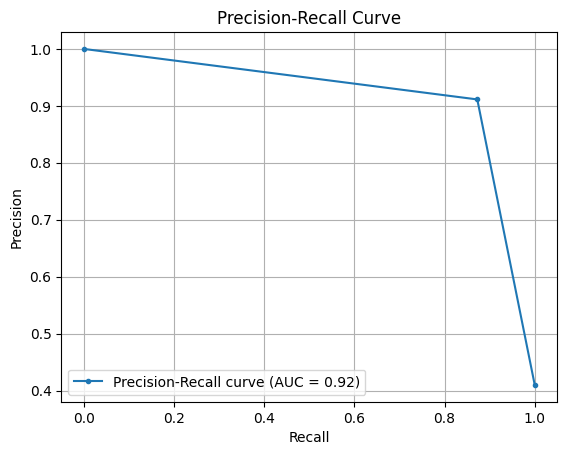

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
auc_score = auc(recall, precision)
print("AUC Score:", auc_score)

plt.figure()
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()
